# Libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning

In [80]:
df = pd.read_excel('./dataset/Bes/Indicatori_per_regione_sesso.xlsx') 

In [81]:
df = df[(df["DOMINIO"] == "Benessere soggettivo") |  (df["DOMINIO"] == "Benessere economico")]
df.reset_index(drop=True, inplace = True)

In [82]:
df

,DOMINIO,CODICE,INDICATORE,SESSO,TERRITORIO,UNITA_MISURA,FONTE,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,NOTE
0,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Piemonte,Euro (prezzi correnti),Istat - Contabilità Nazionale,"19110,4","19499,5","20273,0",...,"19805,2","19961,2","20277,9","20851,5","21284,8","21470,9","20898,8",,,
1,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Valle d'Aosta/Vallée d'Aoste,Euro (prezzi correnti),Istat - Contabilità Nazionale,"19494,4","19677,3","20143,4",...,"20363,6","20517,6","20747,8","21115,5","21528,9","21726,6","21168,4",,,
2,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Liguria,Euro (prezzi correnti),Istat - Contabilità Nazionale,"19237,1","19704,3","20375,5",...,"20455,2","20610,9","20944,9","21664,5","21780,0","22064,7","21421,1",,,
3,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Lombardia,Euro (prezzi correnti),Istat - Contabilità Nazionale,"20444,0","20887,4","21590,4",...,"21543,4","21886,0","22196,8","22818,2","22962,4","23224,2","22456,1",,,
4,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Trentino-Alto Adige/Südtirol,Euro (prezzi correnti),Istat - Contabilità Nazionale,"20269,9","20325,4","20827,9",...,"21948,7","22326,5","22849,2","23383,7","23922,9","24059,6","23130,1",,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Centro,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,,,,...,"18,1","18,8","17,1","15,2","14,6","12,5","14,0","11,0",,
670,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Mezzogiorno,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,,,,...,"19,3","18,2","14,6","15,5","13,2","11,2","11,1","8,4",,
671,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Sud,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,,,,...,"19,6","17,4","14,3","14,4","12,4","11,0","10,8","8,5",,
672,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Isole,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,,,,...,"18,5","19,9","15,2","17,8","14,9","11,5","11,7","8,3",,


In [83]:
for index, row in df[df["INDICATORE"] == "Grande difficoltà ad arrivare a fine mese\xa0"].iterrows():
    df.at[index, "INDICATORE"] = "Grande difficoltà ad arrivare a fine mese"

In [84]:
indicatori_bs = df[df["DOMINIO"] == "Benessere soggettivo"]["INDICATORE"].unique()
indicatori_be = df[df["DOMINIO"] == "Benessere economico"]["INDICATORE"].unique()

In [85]:
indicatori_bs

array(['Soddisfazione per la propria vita',
       'Soddisfazione per il tempo libero',
       'Giudizio positivo sulle prospettive future',
       'Giudizio negativo sulle prospettive future'], dtype=object)

In [86]:
indicatori_be

array(['Reddito disponibile lordo pro capite',
       'Disuguaglianza del reddito netto (s80/s20)', 'Rischio di povertà',
       'Ricchezza netta media pro capite', 'Povertà assoluta (incidenza)',
       'Grave deprivazione materiale', 'Grave deprivazione abitativa',
       'Grande difficoltà ad arrivare a fine mese',
       'Bassa intensità di lavoro',
       "Sovraccarico del costo dell'abitazione",
       'Situazione economica della famiglia'], dtype=object)

In [87]:
df[df["DOMINIO"] == "Benessere soggettivo"]["SESSO"].unique()

array(['Maschi', 'Femmine', 'Totale'], dtype=object)

In [88]:
df[df["DOMINIO"] == "Benessere economico"]["SESSO"].unique()

array(['Totale', 'Maschi', 'Femmine'], dtype=object)

In [89]:
df["TERRITORIO"].unique()

array(['Piemonte', "Valle d'Aosta/Vallée d'Aoste", 'Liguria', 'Lombardia',
       'Trentino-Alto Adige/Südtirol',
       'Provincia Autonoma di Bolzano/Bozen',
       'Provincia Autonoma di Trento', 'Veneto', 'Friuli-Venezia Giulia',
       'Emilia-Romagna', 'Toscana', 'Umbria', 'Marche', 'Lazio',
       'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata',
       'Calabria', 'Sicilia', 'Sardegna', 'Nord', 'Nord-ovest',
       'Nord-est', 'Centro', 'Mezzogiorno', 'Sud', 'Isole', 'Italia'],
      dtype=object)

In [90]:
dictGender_bs = {}
for indicatore in indicatori_bs:
    listt = []
    for gender in df[df["INDICATORE"] == indicatore]["SESSO"].unique():
        listt.append(gender)
    dictGender_bs[indicatore] = listt
        
dictGender_be = {}
for indicatore in indicatori_be:
    listt = []
    for gender in df[df["INDICATORE"] == indicatore]["SESSO"].unique():
        listt.append(gender)
    dictGender_be[indicatore] = listt
    

In [91]:
dictGender_bs

{'Soddisfazione per la propria vita': ['Maschi', 'Femmine', 'Totale'],
 'Soddisfazione per il tempo libero': ['Maschi', 'Femmine', 'Totale'],
 'Giudizio positivo sulle prospettive future': ['Maschi', 'Femmine', 'Totale'],
 'Giudizio negativo sulle prospettive future': ['Maschi', 'Femmine', 'Totale']}

In [92]:
dictGender_be

{'Reddito disponibile lordo pro capite': ['Totale'],
 'Disuguaglianza del reddito netto (s80/s20)': ['Maschi', 'Femmine', 'Totale'],
 'Rischio di povertà': ['Maschi', 'Femmine', 'Totale'],
 'Ricchezza netta media pro capite': ['Maschi', 'Femmine', 'Totale'],
 'Povertà assoluta (incidenza)': ['Maschi', 'Femmine', 'Totale'],
 'Grave deprivazione materiale': ['Maschi', 'Femmine', 'Totale'],
 'Grave deprivazione abitativa': ['Maschi', 'Femmine', 'Totale'],
 'Grande difficoltà ad arrivare a fine mese': ['Maschi', 'Femmine', 'Totale'],
 'Bassa intensità di lavoro': ['Maschi', 'Femmine', 'Totale'],
 "Sovraccarico del costo dell'abitazione": ['Maschi', 'Femmine', 'Totale'],
 'Situazione economica della famiglia': ['Totale']}

In [93]:
df["NOTE"].unique()

array([' ',
       "L'indicatore è riferito all'anno di conseguimento del reddito (t) e non all'anno d'indagine (t+1)",
       "L'indicatore è riferito all'anno d'indagine (t) mentre il reddito è riferito all'anno precedente (t-1)",
       'I dati del 2021 sono stime preliminari.',
       '(a) Dato statisticamente poco significativo, perché corrispondente ad una numerosità campionaria compresa tra 20 e 49 unità.',
       "L'indicatore è riferito all'anno d'indagine (t) mentre il reddito è riferito all'anno precedente (t-1). Modifica dal 2007 della definizione europea dei costi totali per l'abitazione. (a) Dato statisticamente poco significativo, perché corrispondente ad una numerosità campionaria compresa tra 20 e 49 unità."],
      dtype=object)

In [94]:
df.isna().sum()

DOMINIO         0
CODICE          0
INDICATORE      0
SESSO           0
TERRITORIO      0
UNITA_MISURA    0
FONTE           0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
NOTE            0
dtype: int64

In [95]:
df.iloc[0][2022]

' '

In [96]:
nullPerColumn = {}
for column in df.columns:
    summ = 0
    for el in df[column]:
        if(el == ' '):
            summ+=1
    nullPerColumn[column] = summ
    

In [97]:
nullPerColumn

{'DOMINIO': 0,
 'CODICE': 0,
 'INDICATORE': 0,
 'SESSO': 0,
 'TERRITORIO': 0,
 'UNITA_MISURA': 0,
 'FONTE': 0,
 2004: 414,
 2005: 306,
 2006: 300,
 2007: 306,
 2008: 300,
 2009: 306,
 2010: 210,
 2011: 216,
 2012: 30,
 2013: 36,
 2014: 30,
 2015: 36,
 2016: 0,
 2017: 6,
 2018: 6,
 2019: 6,
 2020: 38,
 2021: 260,
 2022: 674,
 'NOTE': 426}

In [98]:
list_statisticamentePocoSign = []
for column in [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]:
    newCol = []
    index = 0
    for a in df[column]:
        if(isinstance(a, int) or isinstance(a, float)):
            newCol.append(float(a))
        else:
            if(a == " " or a == "..." or a == ".." or a == "...." or a == "*"):
                newCol.append(np.NaN)
            elif("(a)" in a):
                #dato statisticamente poco significativo
                list_statisticamentePocoSign.append((column, index))
                newCol.append(float(a.split("(a)")[0].strip().replace(',', '.')))
            else:
                newCol.append(float(a.replace(',', '.')))
        index +=1
    df[column] = newCol

In [99]:
list_statisticamentePocoSign

[(2004, 127),
 (2004, 140),
 (2004, 228),
 (2005, 130),
 (2005, 141),
 (2005, 159),
 (2005, 173),
 (2005, 196),
 (2005, 228),
 (2006, 130),
 (2006, 131),
 (2006, 141),
 (2006, 196),
 (2006, 223),
 (2006, 227),
 (2006, 228),
 (2007, 128),
 (2007, 130),
 (2007, 131),
 (2007, 196),
 (2007, 223),
 (2007, 227),
 (2007, 228),
 (2007, 255),
 (2007, 260),
 (2007, 269),
 (2008, 130),
 (2008, 141),
 (2008, 159),
 (2008, 196),
 (2008, 223),
 (2008, 227),
 (2008, 228),
 (2008, 260),
 (2008, 269),
 (2009, 128),
 (2009, 141),
 (2009, 159),
 (2009, 191),
 (2009, 195),
 (2009, 196),
 (2009, 223),
 (2009, 227),
 (2009, 228),
 (2009, 255),
 (2009, 260),
 (2009, 268),
 (2010, 130),
 (2010, 141),
 (2010, 163),
 (2010, 164),
 (2010, 191),
 (2010, 196),
 (2010, 223),
 (2010, 227),
 (2010, 228),
 (2010, 255),
 (2010, 260),
 (2010, 269),
 (2011, 127),
 (2011, 130),
 (2011, 132),
 (2011, 163),
 (2011, 195),
 (2011, 196),
 (2011, 223),
 (2011, 227),
 (2011, 228),
 (2011, 255),
 (2011, 259),
 (2011, 269),
 (2012

In [100]:
df.isna().sum()

DOMINIO           0
CODICE            0
INDICATORE        0
SESSO             0
TERRITORIO        0
UNITA_MISURA      0
FONTE             0
2004            415
2005            327
2006            320
2007            326
2008            321
2009            328
2010            231
2011            235
2012             49
2013             58
2014             33
2015             39
2016              3
2017              9
2018              9
2019             10
2020             48
2021            278
2022            674
NOTE              0
dtype: int64

In [101]:
for index, row in df[df["NOTE"] == " "].iterrows():
    df.at[index, "NOTE"] = np.nan

In [102]:
df.isna().sum()

DOMINIO           0
CODICE            0
INDICATORE        0
SESSO             0
TERRITORIO        0
UNITA_MISURA      0
FONTE             0
2004            415
2005            327
2006            320
2007            326
2008            321
2009            328
2010            231
2011            235
2012             49
2013             58
2014             33
2015             39
2016              3
2017              9
2018              9
2019             10
2020             48
2021            278
2022            674
NOTE            426
dtype: int64

In [103]:
df

,DOMINIO,CODICE,INDICATORE,SESSO,TERRITORIO,UNITA_MISURA,FONTE,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,NOTE
0,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Piemonte,Euro (prezzi correnti),Istat - Contabilità Nazionale,19110.4,19499.5,20273.0,...,19805.2,19961.2,20277.9,20851.5,21284.8,21470.9,20898.8,NaN,NaN,NaN
1,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Valle d'Aosta/Vallée d'Aoste,Euro (prezzi correnti),Istat - Contabilità Nazionale,19494.4,19677.3,20143.4,...,20363.6,20517.6,20747.8,21115.5,21528.9,21726.6,21168.4,NaN,NaN,NaN
2,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Liguria,Euro (prezzi correnti),Istat - Contabilità Nazionale,19237.1,19704.3,20375.5,...,20455.2,20610.9,20944.9,21664.5,21780.0,22064.7,21421.1,NaN,NaN,NaN
3,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Lombardia,Euro (prezzi correnti),Istat - Contabilità Nazionale,20444.0,20887.4,21590.4,...,21543.4,21886.0,22196.8,22818.2,22962.4,23224.2,22456.1,NaN,NaN,NaN
4,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Trentino-Alto Adige/Südtirol,Euro (prezzi correnti),Istat - Contabilità Nazionale,20269.9,20325.4,20827.9,...,21948.7,22326.5,22849.2,23383.7,23922.9,24059.6,23130.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Centro,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,NaN,NaN,...,18.1,18.8,17.1,15.2,14.6,12.5,14.0,11.0,NaN,NaN
670,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Mezzogiorno,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,NaN,NaN,...,19.3,18.2,14.6,15.5,13.2,11.2,11.1,8.4,NaN,NaN
671,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Sud,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,NaN,NaN,...,19.6,17.4,14.3,14.4,12.4,11.0,10.8,8.5,NaN,NaN
672,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Isole,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,NaN,NaN,...,18.5,19.9,15.2,17.8,14.9,11.5,11.7,8.3,NaN,NaN


In [104]:
newCol = []
new_df = pd.DataFrame(columns = ["ANNO"])
for anno in range(2004, 2023):
    for i in range (0, 674):
        newCol.append(anno)

In [105]:
new_df["ANNO"] = newCol

In [106]:
new_df

,ANNO
0,2004
1,2004
2,2004
3,2004
4,2004
...,...
12801,2022
12802,2022
12803,2022
12804,2022


In [107]:
len(df["DOMINIO"].values.tolist() * 19)

12806

In [108]:
new_df["DOMINIO"] = df["DOMINIO"].values.tolist() * 19

In [109]:
new_df["CODICE"] = df["CODICE"].values.tolist() * 19

In [110]:
new_df["INDICATORE"] = df["INDICATORE"].values.tolist() * 19

In [111]:
new_df["SESSO"] = df["SESSO"].values.tolist() * 19

In [112]:
new_df["TERRITORIO"] = df["TERRITORIO"].values.tolist() * 19

In [113]:
new_df["UNITA_MISURA"] = df["UNITA_MISURA"].values.tolist() *19

In [114]:
new_df["FONTE"] = df["FONTE"].values.tolist() * 19

In [115]:
new_df["NOTE"] = df["NOTE"].values.tolist() * 19

In [116]:
new_df

,ANNO,DOMINIO,CODICE,INDICATORE,SESSO,TERRITORIO,UNITA_MISURA,FONTE,NOTE
0,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Piemonte,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN
1,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Valle d'Aosta/Vallée d'Aoste,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN
2,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Liguria,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN
3,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Lombardia,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN
4,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Trentino-Alto Adige/Südtirol,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN
...,...,...,...,...,...,...,...,...,...
12801,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Centro,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN
12802,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Mezzogiorno,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN
12803,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Sud,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN
12804,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Isole,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN


In [117]:
valueColumn = []
new_df["VALORE"] = [0] * 12806

In [118]:
new_df

,ANNO,DOMINIO,CODICE,INDICATORE,SESSO,TERRITORIO,UNITA_MISURA,FONTE,NOTE,VALORE
0,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Piemonte,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,0
1,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Valle d'Aosta/Vallée d'Aoste,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,0
2,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Liguria,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,0
3,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Lombardia,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,0
4,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Trentino-Alto Adige/Südtirol,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,0
...,...,...,...,...,...,...,...,...,...,...
12801,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Centro,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,0
12802,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Mezzogiorno,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,0
12803,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Sud,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,0
12804,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Isole,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,0


In [119]:
index = 0
for column in [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]:
    for el in df[column]:
        new_df.at[index,"VALORE"] = el
        index += 1

In [120]:
new_df

,ANNO,DOMINIO,CODICE,INDICATORE,SESSO,TERRITORIO,UNITA_MISURA,FONTE,NOTE,VALORE
0,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Piemonte,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,19110.4
1,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Valle d'Aosta/Vallée d'Aoste,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,19494.4
2,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Liguria,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,19237.1
3,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Lombardia,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,20444.0
4,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Trentino-Alto Adige/Südtirol,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,20269.9
...,...,...,...,...,...,...,...,...,...,...
12801,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Centro,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,NaN
12802,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Mezzogiorno,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,NaN
12803,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Sud,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,NaN
12804,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Isole,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,NaN


In [121]:
new_df.isna().sum()

ANNO               0
DOMINIO            0
CODICE             0
INDICATORE         0
SESSO              0
TERRITORIO         0
UNITA_MISURA       0
FONTE              0
NOTE            8094
VALORE          3713
dtype: int64

In [122]:
for index, row in new_df.iterrows():
    if(row["TERRITORIO"] == "Trentino-Alto Adige/Südtirol"):
        new_df.at[index, "TERRITORIO"] = "Trentino-Alto Adige"
    if(row["TERRITORIO"] == "Valle d'Aosta/Vallée d'Aoste"):
        new_df.at[index, "TERRITORIO"] = "Valle d'Aosta"
    

In [123]:
new_df["TERRITORIO"].unique()

array(['Piemonte', "Valle d'Aosta", 'Liguria', 'Lombardia',
       'Trentino-Alto Adige', 'Provincia Autonoma di Bolzano/Bozen',
       'Provincia Autonoma di Trento', 'Veneto', 'Friuli-Venezia Giulia',
       'Emilia-Romagna', 'Toscana', 'Umbria', 'Marche', 'Lazio',
       'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata',
       'Calabria', 'Sicilia', 'Sardegna', 'Nord', 'Nord-ovest',
       'Nord-est', 'Centro', 'Mezzogiorno', 'Sud', 'Isole', 'Italia'],
      dtype=object)

In [127]:
new_df.to_csv("./dataset/integrated/raw.csv")

In [128]:
df = pd.read_csv("./dataset/integrated/raw.csv", index_col = 0)

In [129]:
df

,ANNO,DOMINIO,CODICE,INDICATORE,SESSO,TERRITORIO,UNITA_MISURA,FONTE,NOTE,VALORE
0,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Piemonte,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,19110.4
1,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Valle d'Aosta,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,19494.4
2,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Liguria,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,19237.1
3,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Lombardia,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,20444.0
4,2004,Benessere economico,04BEC001,Reddito disponibile lordo pro capite,Totale,Trentino-Alto Adige,Euro (prezzi correnti),Istat - Contabilità Nazionale,NaN,20269.9
...,...,...,...,...,...,...,...,...,...,...
12801,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Centro,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,NaN
12802,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Mezzogiorno,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,NaN
12803,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Sud,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,NaN
12804,2022,Benessere soggettivo,08BSO004,Giudizio negativo sulle prospettive future,Totale,Isole,Valori percentuali,Istat - Indagine Aspetti della vita quotidiana,NaN,NaN


In [130]:
df["TERRITORIO"].unique()

array(['Piemonte', "Valle d'Aosta", 'Liguria', 'Lombardia',
       'Trentino-Alto Adige', 'Provincia Autonoma di Bolzano/Bozen',
       'Provincia Autonoma di Trento', 'Veneto', 'Friuli-Venezia Giulia',
       'Emilia-Romagna', 'Toscana', 'Umbria', 'Marche', 'Lazio',
       'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata',
       'Calabria', 'Sicilia', 'Sardegna', 'Nord', 'Nord-ovest',
       'Nord-est', 'Centro', 'Mezzogiorno', 'Sud', 'Isole', 'Italia'],
      dtype=object)

In [131]:
indicators = df["INDICATORE"].unique()

In [132]:
indicators

array(['Reddito disponibile lordo pro capite',
       'Disuguaglianza del reddito netto (s80/s20)', 'Rischio di povertà',
       'Ricchezza netta media pro capite', 'Povertà assoluta (incidenza)',
       'Grave deprivazione materiale', 'Grave deprivazione abitativa',
       'Grande difficoltà ad arrivare a fine mese',
       'Bassa intensità di lavoro',
       "Sovraccarico del costo dell'abitazione",
       'Situazione economica della famiglia',
       'Soddisfazione per la propria vita',
       'Soddisfazione per il tempo libero',
       'Giudizio positivo sulle prospettive future',
       'Giudizio negativo sulle prospettive future'], dtype=object)

In [133]:
dfAvail = pd.DataFrame(columns = ["DOMINIO", "INDICATORE", "ANNO", "TERRITORIO", "VALORE", "UNITA_MISURA"])
dfAvailLen = 0
for indicatore in indicators:
    df_sub = df[(df["INDICATORE"] == indicatore) & (df["SESSO"] == "Totale")]
    anni = df_sub["ANNO"].unique()
    for anno in anni:
        territori = df_sub[(df_sub["ANNO"] == anno) & (df_sub["ANNO"] == anno)]["TERRITORIO"].unique()
        for territorio in territori:
            dfAvail.loc[dfAvailLen] = [df_sub[(df_sub["ANNO"] == anno) & (df_sub["TERRITORIO"] == territorio) ]["DOMINIO"].values[0],
                                       indicatore, anno, territorio, df_sub[(df_sub["ANNO"] == anno) & (df_sub["TERRITORIO"] == territorio) ]["VALORE"].values[0], 
                                      df_sub[(df_sub["ANNO"] == anno) & (df_sub["TERRITORIO"] == territorio) ]["UNITA_MISURA"].values[0]]
            dfAvailLen += 1

In [134]:
dfAvail

,DOMINIO,INDICATORE,ANNO,TERRITORIO,VALORE,UNITA_MISURA
0,Benessere economico,Reddito disponibile lordo pro capite,2004,Piemonte,19110.4,Euro (prezzi correnti)
1,Benessere economico,Reddito disponibile lordo pro capite,2004,Valle d'Aosta,19494.4,Euro (prezzi correnti)
2,Benessere economico,Reddito disponibile lordo pro capite,2004,Liguria,19237.1,Euro (prezzi correnti)
3,Benessere economico,Reddito disponibile lordo pro capite,2004,Lombardia,20444.0,Euro (prezzi correnti)
4,Benessere economico,Reddito disponibile lordo pro capite,2004,Trentino-Alto Adige,20269.9,Euro (prezzi correnti)
...,...,...,...,...,...,...
7633,Benessere soggettivo,Giudizio negativo sulle prospettive future,2022,Centro,NaN,Valori percentuali
7634,Benessere soggettivo,Giudizio negativo sulle prospettive future,2022,Mezzogiorno,NaN,Valori percentuali
7635,Benessere soggettivo,Giudizio negativo sulle prospettive future,2022,Sud,NaN,Valori percentuali
7636,Benessere soggettivo,Giudizio negativo sulle prospettive future,2022,Isole,NaN,Valori percentuali


In [135]:
dictAvail = {}
for indicatore in indicators:
    df_sub = dfAvail[dfAvail["INDICATORE"] == indicatore]
    dictAvail[indicatore] = {}
    anni = df_sub["ANNO"].unique()
    for anno in anni:
        df_sub2 = df_sub[df_sub["ANNO"] == anno]
        territoriList = []
        for territorio in df_sub2["TERRITORIO"].unique():
            if(not np.isnan(df_sub2[df_sub2["TERRITORIO"] == territorio]["VALORE"].values[0] )):
                territoriList.append(territorio)
        dictAvail[indicatore][anno] = territoriList

In [136]:
dictAvail

{'Reddito disponibile lordo pro capite': {2004: ['Piemonte',
   "Valle d'Aosta",
   'Liguria',
   'Lombardia',
   'Trentino-Alto Adige',
   'Provincia Autonoma di Bolzano/Bozen',
   'Provincia Autonoma di Trento',
   'Veneto',
   'Friuli-Venezia Giulia',
   'Emilia-Romagna',
   'Toscana',
   'Umbria',
   'Marche',
   'Lazio',
   'Abruzzo',
   'Molise',
   'Campania',
   'Puglia',
   'Basilicata',
   'Calabria',
   'Sicilia',
   'Sardegna',
   'Nord',
   'Nord-ovest',
   'Nord-est',
   'Centro',
   'Mezzogiorno',
   'Sud',
   'Isole',
   'Italia'],
  2005: ['Piemonte',
   "Valle d'Aosta",
   'Liguria',
   'Lombardia',
   'Trentino-Alto Adige',
   'Provincia Autonoma di Bolzano/Bozen',
   'Provincia Autonoma di Trento',
   'Veneto',
   'Friuli-Venezia Giulia',
   'Emilia-Romagna',
   'Toscana',
   'Umbria',
   'Marche',
   'Lazio',
   'Abruzzo',
   'Molise',
   'Campania',
   'Puglia',
   'Basilicata',
   'Calabria',
   'Sicilia',
   'Sardegna',
   'Nord',
   'Nord-ovest',
   'Nord-est',

In [137]:
dfAvail.to_csv("./dataset/integrated/raw.csv")

# Correlation on non-null pairs

In [263]:
df = pd.read_csv("./dataset/integrated/raw.csv", index_col = 0)
df

,DOMINIO,INDICATORE,ANNO,TERRITORIO,VALORE,UNITA_MISURA
0,Benessere economico,Reddito disponibile lordo pro capite,2004,Piemonte,19110.4,Euro (prezzi correnti)
1,Benessere economico,Reddito disponibile lordo pro capite,2004,Valle d'Aosta,19494.4,Euro (prezzi correnti)
2,Benessere economico,Reddito disponibile lordo pro capite,2004,Liguria,19237.1,Euro (prezzi correnti)
3,Benessere economico,Reddito disponibile lordo pro capite,2004,Lombardia,20444.0,Euro (prezzi correnti)
4,Benessere economico,Reddito disponibile lordo pro capite,2004,Trentino-Alto Adige,20269.9,Euro (prezzi correnti)
...,...,...,...,...,...,...
7633,Benessere soggettivo,Giudizio negativo sulle prospettive future,2022,Centro,NaN,Valori percentuali
7634,Benessere soggettivo,Giudizio negativo sulle prospettive future,2022,Mezzogiorno,NaN,Valori percentuali
7635,Benessere soggettivo,Giudizio negativo sulle prospettive future,2022,Sud,NaN,Valori percentuali
7636,Benessere soggettivo,Giudizio negativo sulle prospettive future,2022,Isole,NaN,Valori percentuali


In [264]:
TerritoriAvoid = []
listTerritori = []
for territorio in df["TERRITORIO"].unique():
    if(territorio not in TerritoriAvoid):
        listTerritori.append(territorio)

In [265]:
np.concatenate([df["INDICATORE"].unique(), [1,2]])

array(['Reddito disponibile lordo pro capite',
       'Disuguaglianza del reddito netto (s80/s20)', 'Rischio di povertà',
       'Ricchezza netta media pro capite', 'Povertà assoluta (incidenza)',
       'Grave deprivazione materiale', 'Grave deprivazione abitativa',
       'Grande difficoltà ad arrivare a fine mese',
       'Bassa intensità di lavoro',
       "Sovraccarico del costo dell'abitazione",
       'Situazione economica della famiglia',
       'Soddisfazione per la propria vita',
       'Soddisfazione per il tempo libero',
       'Giudizio positivo sulle prospettive future',
       'Giudizio negativo sulle prospettive future', 1, 2], dtype=object)

In [266]:
dfCorr = pd.DataFrame(columns = np.concatenate([df["INDICATORE"].unique(), ["TERRITORIO","ANNO"]]))
for indicatore in dfCorr.columns:
    column = []
    for anno in range(2004, 2023):
        for territorio in listTerritori:
            valore = df[(df["INDICATORE"] == indicatore) & (df["TERRITORIO"] == territorio) & (df["ANNO"] == anno)]["VALORE"].values
            if(valore.shape[0] == 0):
                column.append(np.NaN)
            else:
                column.append(valore[0])
    dfCorr[indicatore] = column
    
colAnno = []
for anno in range(2004, 2023):
    for i in range(0, len(listTerritori)):
        colAnno.append(anno)
dfCorr["ANNO"] = colAnno

colTerr = []
for anno in range(2004, 2023):
    for territorio in listTerritori:
        colTerr.append(territorio)
dfCorr["TERRITORIO"] = colTerr

In [267]:
dfCorr

,Reddito disponibile lordo pro capite,Disuguaglianza del reddito netto (s80/s20),Rischio di povertà,Ricchezza netta media pro capite,Povertà assoluta (incidenza),Grave deprivazione materiale,Grave deprivazione abitativa,Grande difficoltà ad arrivare a fine mese,Bassa intensità di lavoro,Sovraccarico del costo dell'abitazione,Situazione economica della famiglia,Soddisfazione per la propria vita,Soddisfazione per il tempo libero,Giudizio positivo sulle prospettive future,Giudizio negativo sulle prospettive future,TERRITORIO,ANNO
0,19110.4,4.8,12.8,NaN,NaN,3.4,7.2,11.6,8.9,12.0,NaN,NaN,NaN,NaN,NaN,Piemonte,2004
1,19494.4,4.1,9.5,NaN,NaN,2.7,7.0,6.2,7.4,9.7,NaN,NaN,NaN,NaN,NaN,Valle d'Aosta,2004
2,19237.1,5.2,13.3,NaN,NaN,2.8,5.4,8.9,12.4,14.6,NaN,NaN,NaN,NaN,NaN,Liguria,2004
3,20444.0,4.9,10.0,NaN,NaN,2.4,4.9,9.1,7.5,12.6,NaN,NaN,NaN,NaN,NaN,Lombardia,2004
4,20269.9,4.3,8.8,NaN,NaN,1.8,9.0,4.8,5.1,11.5,NaN,NaN,NaN,NaN,NaN,Trentino-Alto Adige,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Centro,2022
566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mezzogiorno,2022
567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sud,2022
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Isole,2022


In [268]:
dfCorr.rename(columns={"Reddito disponibile lordo pro capite": "Per capita adjusted disposable income", 
                   "Disuguaglianza del reddito netto (s80/s20)": "Disposable income inequality",
                   "Rischio di povertà": "People at risk of poverty", 
                   "Ricchezza netta media pro capite": "Per capita net wealth",
                   "Povertà assoluta (incidenza)": "People living in absolute poverty", 
                   "Grave deprivazione materiale": "Severe material deprivation rate",
                   "Grave deprivazione abitativa": "Severe housing deprivation rate", 
                   "Grande difficoltà ad arrivare a fine mese": "Difficulties to make ends meet",
                   "Bassa intensità di lavoro": "Low work intensity", 
                   "Sovraccarico del costo dell'abitazione": "Housing cost overburden",
                   "Situazione economica della famiglia": "Family economic conditions", 
                   "Soddisfazione per la propria vita": "Satisfaction with one's own life",
                   "Soddisfazione per il tempo libero": "Leisure satisfaction", 
                   "Giudizio positivo sulle prospettive future": "Positive verdict on future prospects",
                   "Giudizio negativo sulle prospettive future": "Negative verdict on future prospects"}, inplace=True)

In [269]:
len(listTerritori) * (2023-2004)

570

In [270]:
dfCorr.iloc[:, 0:15].corr()

,Per capita adjusted disposable income,Disposable income inequality,People at risk of poverty,Per capita net wealth,People living in absolute poverty,Severe material deprivation rate,Severe housing deprivation rate,Difficulties to make ends meet,Low work intensity,Housing cost overburden,Family economic conditions,Satisfaction with one's own life,Leisure satisfaction,Positive verdict on future prospects,Negative verdict on future prospects
Per capita adjusted disposable income,1.000000,-0.619765,-0.900182,0.891573,-0.453898,-0.739048,-0.560446,-0.766182,-0.839287,-0.268512,-0.549617,0.694686,0.787433,0.409473,-0.268275
Disposable income inequality,-0.619765,1.000000,0.797374,-0.744528,0.765097,0.760704,0.447468,0.634333,0.805277,0.443586,0.435719,-0.599079,-0.541739,-0.332113,0.133280
People at risk of poverty,-0.900182,0.797374,1.000000,-0.891976,0.613384,0.822828,0.534840,0.773976,0.925319,0.361351,0.430470,-0.614227,-0.706829,-0.370486,0.076015
Per capita net wealth,0.891573,-0.744528,-0.891976,1.000000,-0.532820,-0.720933,-0.811326,-0.715854,-0.881473,-0.365939,-0.995396,0.571216,0.776707,0.498622,0.179682
People living in absolute poverty,-0.453898,0.765097,0.613384,-0.532820,1.000000,0.594793,0.061733,0.138513,0.635413,0.167498,0.393941,-0.377886,-0.228772,-0.253770,-0.340286
Severe material deprivation rate,-0.739048,0.760704,0.822828,-0.720933,0.594793,1.000000,0.552549,0.750312,0.825014,0.275579,0.563018,-0.643312,-0.618204,-0.529533,0.371890
Severe housing deprivation rate,-0.560446,0.447468,0.534840,-0.811326,0.061733,0.552549,1.000000,0.638205,0.504077,0.271752,0.329018,-0.441660,-0.440396,-0.428259,0.407724
Difficulties to make ends meet,-0.766182,0.634333,0.773976,-0.715854,0.138513,0.750312,0.638205,1.000000,0.741302,0.312837,0.357115,-0.585497,-0.751547,-0.442640,0.426789
Low work intensity,-0.839287,0.805277,0.925319,-0.881473,0.635413,0.825014,0.504077,0.741302,1.000000,0.427804,0.536156,-0.620630,-0.683940,-0.359674,0.096266
Housing cost overburden,-0.268512,0.443586,0.361351,-0.365939,0.167498,0.275579,0.271752,0.312837,0.427804,1.000000,0.356670,-0.474172,-0.308603,-0.284074,0.126916


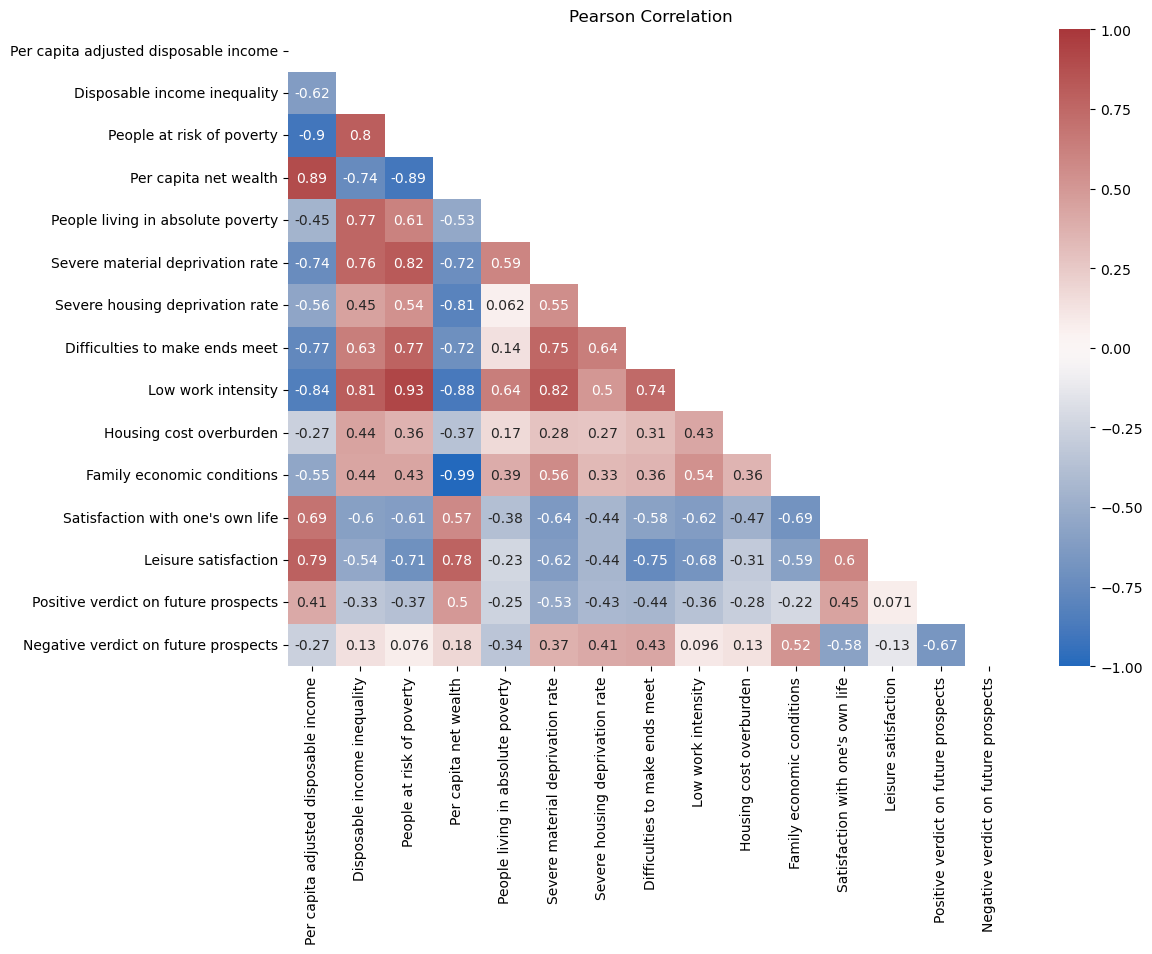

In [271]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

matrix = dfCorr.iloc[:, 0:15].corr().round(3)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title("Pearson Correlation")
plt.savefig("./figures/notNullPairsAll.png")
plt.show()



In [272]:
dfCorr

,Per capita adjusted disposable income,Disposable income inequality,People at risk of poverty,Per capita net wealth,People living in absolute poverty,Severe material deprivation rate,Severe housing deprivation rate,Difficulties to make ends meet,Low work intensity,Housing cost overburden,Family economic conditions,Satisfaction with one's own life,Leisure satisfaction,Positive verdict on future prospects,Negative verdict on future prospects,TERRITORIO,ANNO
0,19110.4,4.8,12.8,NaN,NaN,3.4,7.2,11.6,8.9,12.0,NaN,NaN,NaN,NaN,NaN,Piemonte,2004
1,19494.4,4.1,9.5,NaN,NaN,2.7,7.0,6.2,7.4,9.7,NaN,NaN,NaN,NaN,NaN,Valle d'Aosta,2004
2,19237.1,5.2,13.3,NaN,NaN,2.8,5.4,8.9,12.4,14.6,NaN,NaN,NaN,NaN,NaN,Liguria,2004
3,20444.0,4.9,10.0,NaN,NaN,2.4,4.9,9.1,7.5,12.6,NaN,NaN,NaN,NaN,NaN,Lombardia,2004
4,20269.9,4.3,8.8,NaN,NaN,1.8,9.0,4.8,5.1,11.5,NaN,NaN,NaN,NaN,NaN,Trentino-Alto Adige,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Centro,2022
566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mezzogiorno,2022
567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sud,2022
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Isole,2022


In [273]:
dfCorr.to_csv("./dataset/integrated/dfCorrelationFormatted.csv")

# Correlation of non-null rows

* Remove columns: "Per capita net wealth", "People living in absolute poverty", "Family economic conditions"
* Drop rows with at least one missing value

In [3]:
dfCorr = pd.read_csv("./dataset/integrated/dfCorrelationFormatted.csv", index_col = 0)

In [4]:
dfCorr

,Per capita adjusted disposable income,Disposable income inequality,People at risk of poverty,Per capita net wealth,People living in absolute poverty,Severe material deprivation rate,Severe housing deprivation rate,Difficulties to make ends meet,Low work intensity,Housing cost overburden,Family economic conditions,Satisfaction with one's own life,Leisure satisfaction,Positive verdict on future prospects,Negative verdict on future prospects,TERRITORIO,ANNO
0,19110.4,4.8,12.8,NaN,NaN,3.4,7.2,11.6,8.9,12.0,NaN,NaN,NaN,NaN,NaN,Piemonte,2004
1,19494.4,4.1,9.5,NaN,NaN,2.7,7.0,6.2,7.4,9.7,NaN,NaN,NaN,NaN,NaN,Valle d'Aosta,2004
2,19237.1,5.2,13.3,NaN,NaN,2.8,5.4,8.9,12.4,14.6,NaN,NaN,NaN,NaN,NaN,Liguria,2004
3,20444.0,4.9,10.0,NaN,NaN,2.4,4.9,9.1,7.5,12.6,NaN,NaN,NaN,NaN,NaN,Lombardia,2004
4,20269.9,4.3,8.8,NaN,NaN,1.8,9.0,4.8,5.1,11.5,NaN,NaN,NaN,NaN,NaN,Trentino-Alto Adige,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Centro,2022
566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mezzogiorno,2022
567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sud,2022
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Isole,2022


In [5]:
dfCorr.drop(["Per capita net wealth", "People living in absolute poverty", "Family economic conditions"], axis = 1, inplace = True)

In [6]:
toRemove = []
for index, row in dfCorr.iterrows():
    for column in dfCorr.columns:
        booll = False
        if(column != "TERRITORIO" and np.isnan(row[column])):
            booll = True
        if(booll):
            toRemove.append(index)

In [7]:
dfCorr.drop(toRemove, axis = 0, inplace = True)
dfCorr

,Per capita adjusted disposable income,Disposable income inequality,People at risk of poverty,Severe material deprivation rate,Severe housing deprivation rate,Difficulties to make ends meet,Low work intensity,Housing cost overburden,Satisfaction with one's own life,Leisure satisfaction,Positive verdict on future prospects,Negative verdict on future prospects,TERRITORIO,ANNO
240,19647.9,4.6,12.9,7.3,5.4,8.8,8.3,7.6,41.1,69.5,21.7,23.7,Piemonte,2012
241,20467.1,4.2,9.7,8.3,5.4,10.6,8.7,9.8,43.7,68.2,23.8,22.3,Valle d'Aosta,2012
242,20275.5,5.9,14.3,8.6,7.6,14.9,7.7,12.6,35.5,71.0,19.5,21.1,Liguria,2012
243,21402.7,4.6,9.1,10.5,6.0,13.7,4.9,6.3,40.9,69.8,32.0,18.4,Lombardia,2012
244,21680.4,3.9,10.7,5.1,10.5,7.5,5.0,5.4,53.9,74.6,22.8,16.1,Trentino-Alto Adige,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,20323.8,5.2,15.3,5.5,5.1,5.9,7.6,6.8,42.3,69.0,30.7,12.5,Centro,2019
476,14420.7,6.7,34.7,13.6,6.0,15.3,17.3,11.7,39.2,64.3,29.1,11.2,Mezzogiorno,2019
477,14350.0,6.4,33.7,12.7,6.6,16.7,14.8,10.3,37.6,65.0,29.2,11.0,Sud,2019
478,14569.9,7.3,36.8,15.4,4.7,12.1,22.8,14.8,42.5,62.8,28.8,11.5,Isole,2019


In [8]:
dfCorr.reset_index(drop=True, inplace = True)
dfCorr.to_csv("./dataset/integrated/dfCorrelationFormattedNotNull.csv")

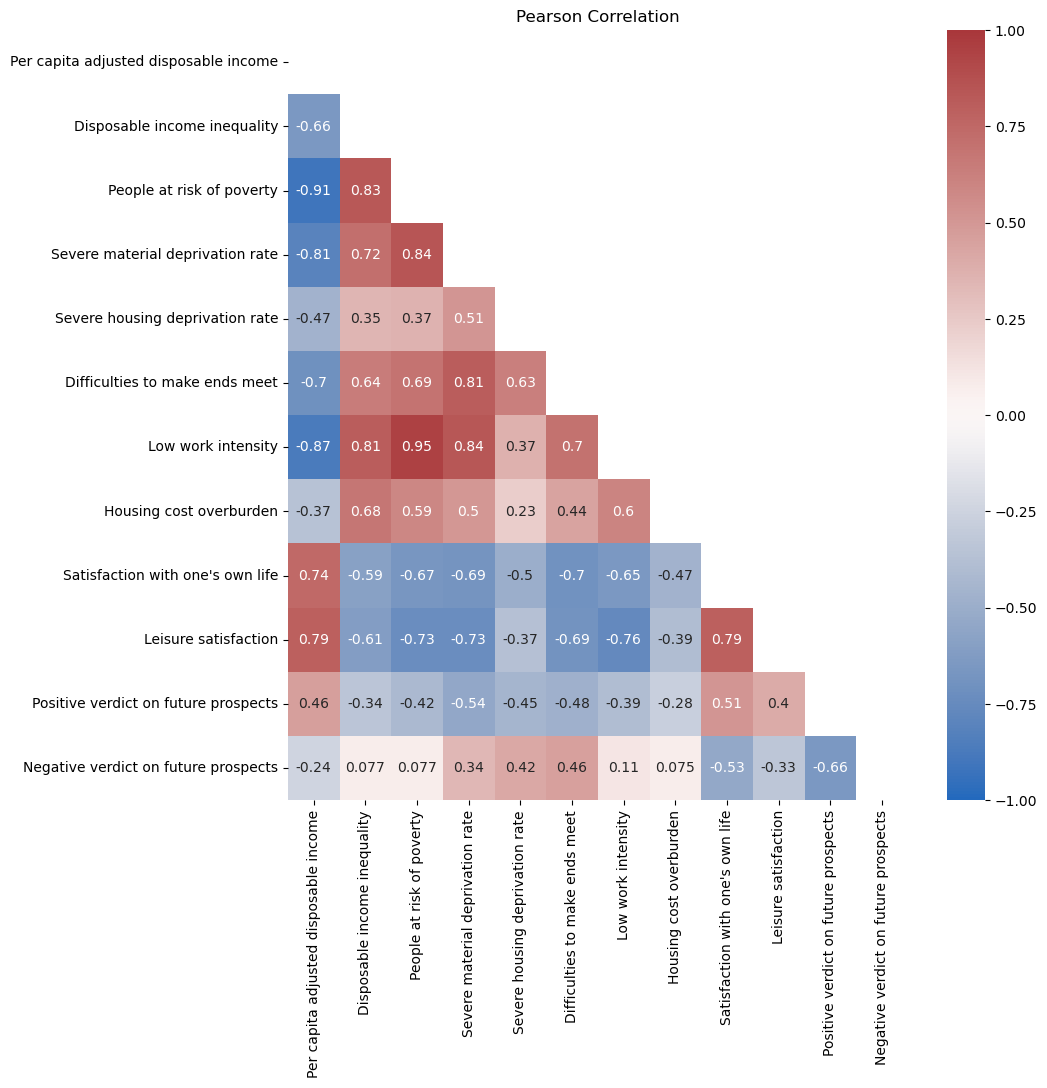

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))

matrix = dfCorr.iloc[:, 0:12].corr().round(3)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title("Pearson Correlation")
plt.savefig("./figures/notNullAll.png", bbox_inches='tight')
plt.show()

In [17]:
dfCorr = pd.read_csv("./dataset/integrated/dfCorrelationFormattedNotNull.csv", index_col = 0)

frequency = {}

for item in dfCorr["ANNO"]:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1

print(frequency)


frequency = {}

for item in dfCorr["TERRITORIO"]:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1

print(frequency)

{2012: 29, 2013: 29, 2014: 29, 2015: 29, 2016: 29, 2017: 28, 2018: 28, 2019: 28}
{'Piemonte': 8, "Valle d'Aosta": 5, 'Liguria': 8, 'Lombardia': 8, 'Trentino-Alto Adige': 8, 'Provincia Autonoma di Trento': 7, 'Veneto': 8, 'Friuli-Venezia Giulia': 8, 'Emilia-Romagna': 8, 'Toscana': 8, 'Umbria': 8, 'Marche': 8, 'Lazio': 8, 'Abruzzo': 8, 'Molise': 8, 'Campania': 8, 'Puglia': 8, 'Basilicata': 8, 'Calabria': 8, 'Sicilia': 8, 'Sardegna': 8, 'Nord': 8, 'Nord-ovest': 8, 'Nord-est': 8, 'Centro': 8, 'Mezzogiorno': 8, 'Sud': 8, 'Isole': 8, 'Italia': 8, 'Provincia Autonoma di Bolzano/Bozen': 1}


In [18]:
import pingouin as pg
dfCorr.iloc[:, 0:12].pcorr().round(3)

,Per capita adjusted disposable income,Disposable income inequality,People at risk of poverty,Severe material deprivation rate,Severe housing deprivation rate,Difficulties to make ends meet,Low work intensity,Housing cost overburden,Satisfaction with one's own life,Leisure satisfaction,Positive verdict on future prospects,Negative verdict on future prospects
Per capita adjusted disposable income,1.000,0.389,-0.692,0.121,-0.313,0.068,-0.215,0.519,0.259,0.178,-0.063,-0.183
Disposable income inequality,0.389,1.000,0.448,-0.068,0.132,0.114,0.120,0.110,-0.107,-0.069,0.033,0.018
People at risk of poverty,-0.692,0.448,1.000,0.273,-0.302,0.100,0.316,0.288,-0.048,0.189,-0.249,-0.431
Severe material deprivation rate,0.121,-0.068,0.273,1.000,0.110,0.339,0.195,-0.089,0.066,-0.077,-0.131,0.157
Severe housing deprivation rate,-0.313,0.132,-0.302,0.110,1.000,0.394,-0.023,0.102,-0.108,0.225,-0.183,-0.127
Difficulties to make ends meet,0.068,0.114,0.100,0.339,0.394,1.000,-0.018,-0.021,0.020,-0.169,0.224,0.304
Low work intensity,-0.215,0.120,0.316,0.195,-0.023,-0.018,1.000,0.290,0.227,-0.271,0.101,0.026
Housing cost overburden,0.519,0.110,0.288,-0.089,0.102,-0.021,0.290,1.000,-0.315,0.104,-0.029,0.043
Satisfaction with one's own life,0.259,-0.107,-0.048,0.066,-0.108,0.020,0.227,-0.315,1.000,0.455,-0.115,-0.397
Leisure satisfaction,0.178,-0.069,0.189,-0.077,0.225,-0.169,-0.271,0.104,0.455,1.000,-0.010,0.073


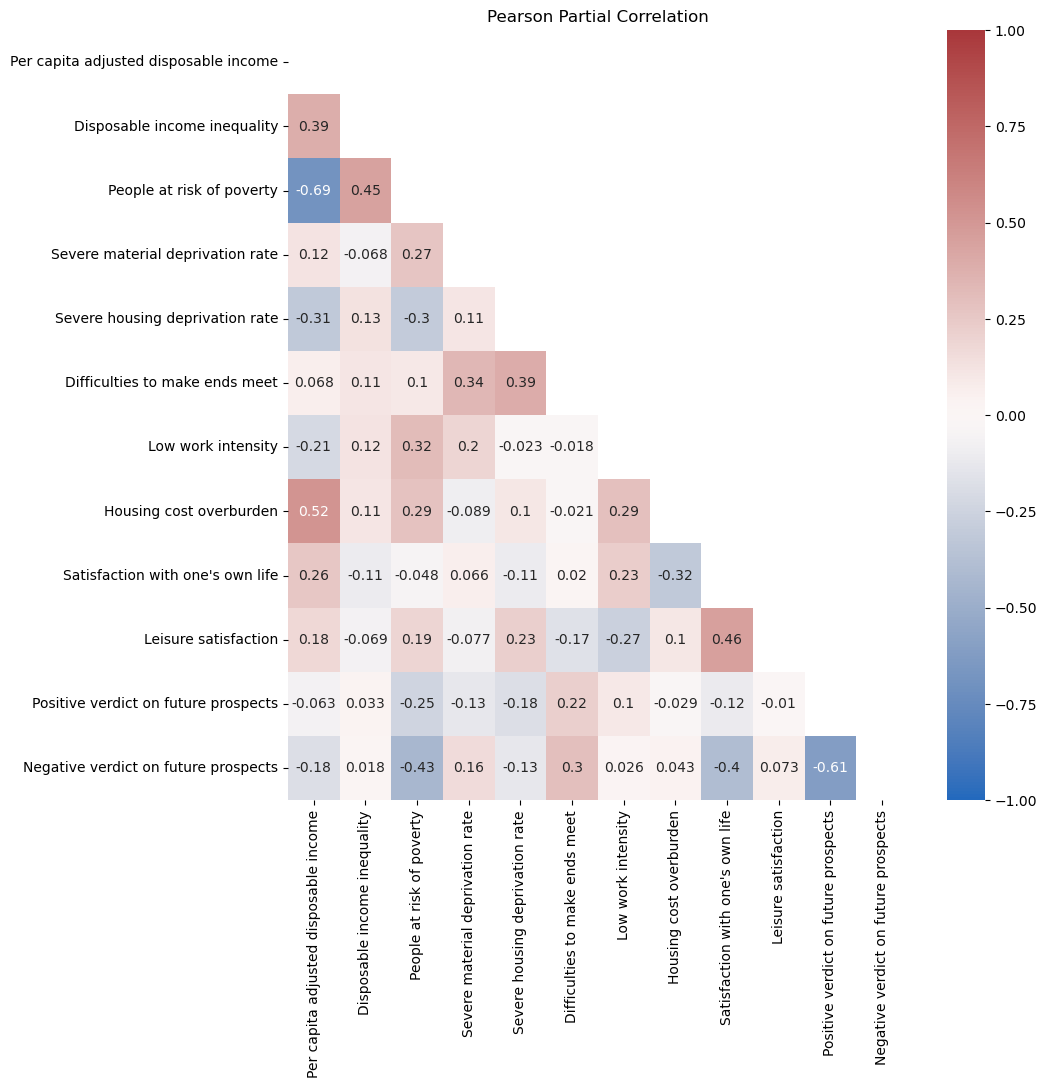

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))

matrix = dfCorr.iloc[:, 0:12].pcorr().round(3)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title("Pearson Partial Correlation")
plt.savefig("./figures/notNullAllPartial.png", bbox_inches='tight')
plt.show()

In [16]:
coeff = []
for index, row in dfCorr.iterrows():
    x = (row["Satisfaction with one's own life"] + row["Leisure satisfaction"] + row["Positive verdict on future prospects"])/300
    y = row["Negative verdict on future prospects"] / 100
    coeff.append(x-y)
    
dfCorr["USWB"] = coeff

In [17]:
dfCorr

,Per capita adjusted disposable income,Disposable income inequality,People at risk of poverty,Severe material deprivation rate,Severe housing deprivation rate,Difficulties to make ends meet,Low work intensity,Housing cost overburden,Satisfaction with one's own life,Leisure satisfaction,Positive verdict on future prospects,Negative verdict on future prospects,TERRITORIO,ANNO,USWB
0,19647.9,4.6,12.9,7.3,5.4,8.8,8.3,7.6,41.1,69.5,21.7,23.7,Piemonte,2012,0.204000
1,20467.1,4.2,9.7,8.3,5.4,10.6,8.7,9.8,43.7,68.2,23.8,22.3,Valle d'Aosta,2012,0.229333
2,20275.5,5.9,14.3,8.6,7.6,14.9,7.7,12.6,35.5,71.0,19.5,21.1,Liguria,2012,0.209000
3,21402.7,4.6,9.1,10.5,6.0,13.7,4.9,6.3,40.9,69.8,32.0,18.4,Lombardia,2012,0.291667
4,21680.4,3.9,10.7,5.1,10.5,7.5,5.0,5.4,53.9,74.6,22.8,16.1,Trentino-Alto Adige,2012,0.343333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,20323.8,5.2,15.3,5.5,5.1,5.9,7.6,6.8,42.3,69.0,30.7,12.5,Centro,2019,0.348333
225,14420.7,6.7,34.7,13.6,6.0,15.3,17.3,11.7,39.2,64.3,29.1,11.2,Mezzogiorno,2019,0.330000
226,14350.0,6.4,33.7,12.7,6.6,16.7,14.8,10.3,37.6,65.0,29.2,11.0,Sud,2019,0.329333
227,14569.9,7.3,36.8,15.4,4.7,12.1,22.8,14.8,42.5,62.8,28.8,11.5,Isole,2019,0.332000


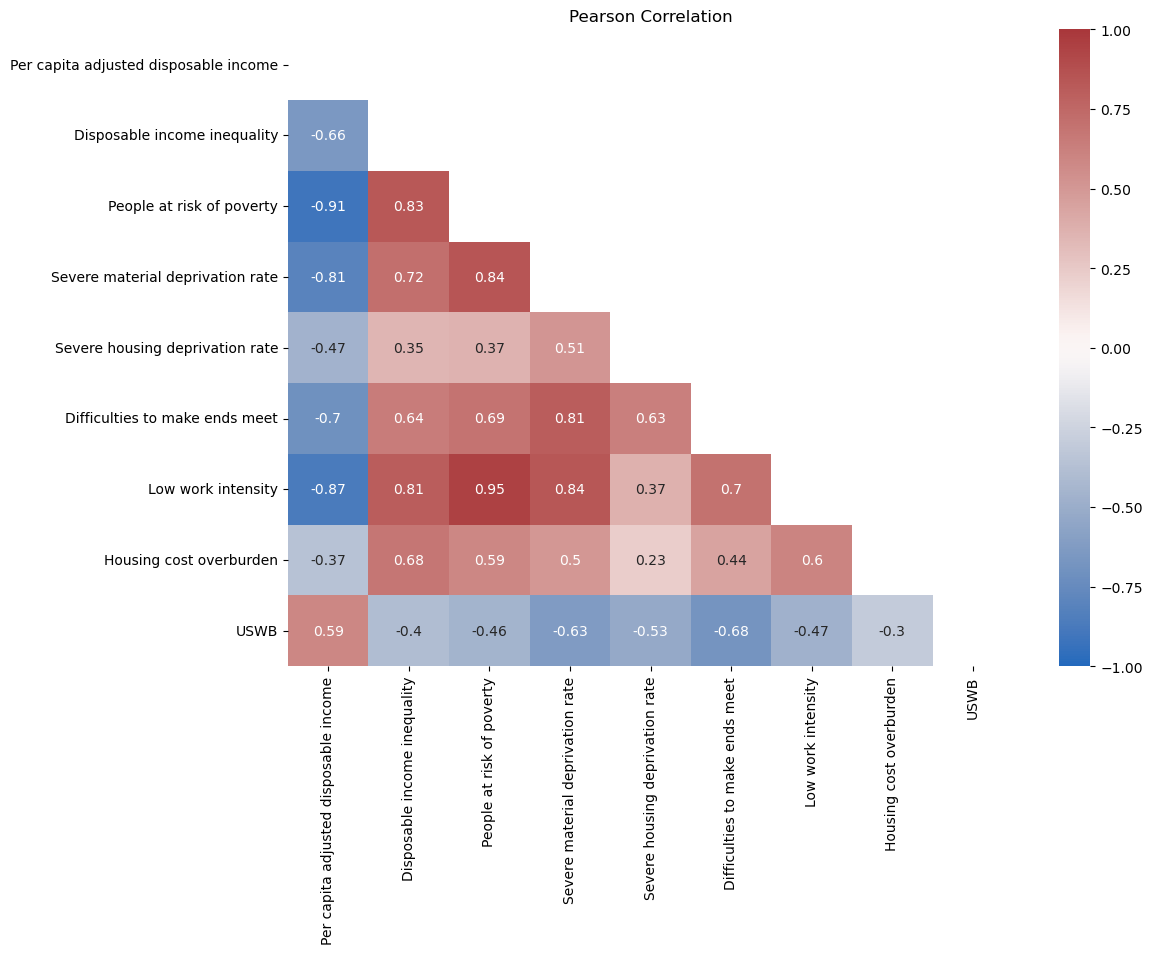

In [25]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

matrix = dfCorr.drop(["TERRITORIO", "ANNO", "Satisfaction with one's own life", "Leisure satisfaction", "Positive verdict on future prospects", "Negative verdict on future prospects"], axis = 1).corr().round(3)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title("Pearson Correlation")
plt.show()

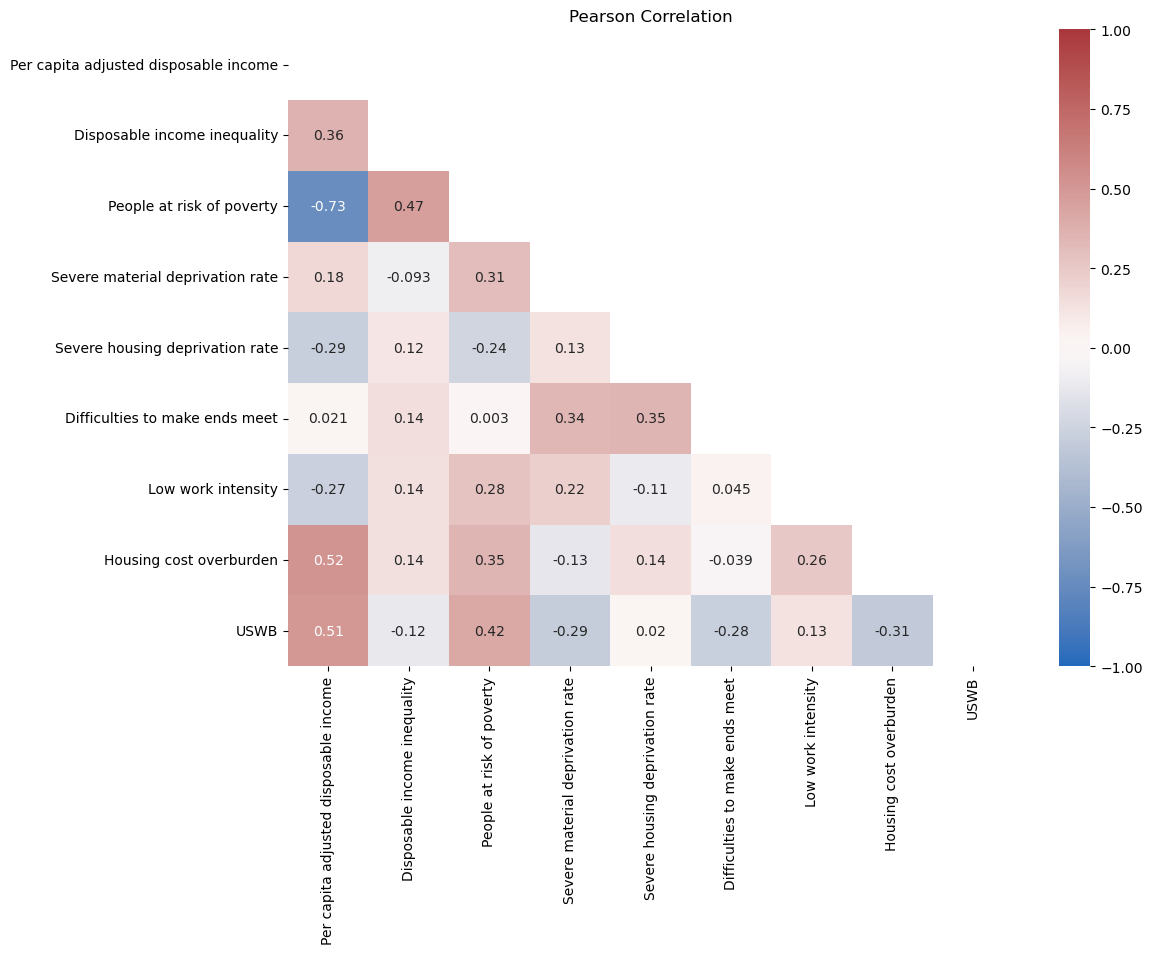

In [26]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

matrix = dfCorr.drop(["TERRITORIO", "ANNO", "Satisfaction with one's own life", "Leisure satisfaction", "Positive verdict on future prospects", "Negative verdict on future prospects"], axis = 1).pcorr().round(3)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title("Pearson Correlation")
plt.show()

# Clustering

In [41]:
df = pd.read_csv("./dataset/integrated/dfCorrelationFormattedNotNull.csv", index_col = 0)

In [42]:
df

,Per capita adjusted disposable income,Disposable income inequality,People at risk of poverty,Severe material deprivation rate,Severe housing deprivation rate,Difficulties to make ends meet,Low work intensity,Housing cost overburden,Satisfaction with one's own life,Leisure satisfaction,Positive verdict on future prospects,Negative verdict on future prospects,TERRITORIO,ANNO
0,19647.9,4.6,12.9,7.3,5.4,8.8,8.3,7.6,41.1,69.5,21.7,23.7,Piemonte,2012
1,20467.1,4.2,9.7,8.3,5.4,10.6,8.7,9.8,43.7,68.2,23.8,22.3,Valle d'Aosta,2012
2,20275.5,5.9,14.3,8.6,7.6,14.9,7.7,12.6,35.5,71.0,19.5,21.1,Liguria,2012
3,21402.7,4.6,9.1,10.5,6.0,13.7,4.9,6.3,40.9,69.8,32.0,18.4,Lombardia,2012
4,21680.4,3.9,10.7,5.1,10.5,7.5,5.0,5.4,53.9,74.6,22.8,16.1,Trentino-Alto Adige,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,20323.8,5.2,15.3,5.5,5.1,5.9,7.6,6.8,42.3,69.0,30.7,12.5,Centro,2019
225,14420.7,6.7,34.7,13.6,6.0,15.3,17.3,11.7,39.2,64.3,29.1,11.2,Mezzogiorno,2019
226,14350.0,6.4,33.7,12.7,6.6,16.7,14.8,10.3,37.6,65.0,29.2,11.0,Sud,2019
227,14569.9,7.3,36.8,15.4,4.7,12.1,22.8,14.8,42.5,62.8,28.8,11.5,Isole,2019


In [43]:
df.rename(columns={'TERRITORIO': 'Territory', 'ANNO': 'Year'}, inplace = True)
df

,Per capita adjusted disposable income,Disposable income inequality,People at risk of poverty,Severe material deprivation rate,Severe housing deprivation rate,Difficulties to make ends meet,Low work intensity,Housing cost overburden,Satisfaction with one's own life,Leisure satisfaction,Positive verdict on future prospects,Negative verdict on future prospects,Territory,Year
0,19647.9,4.6,12.9,7.3,5.4,8.8,8.3,7.6,41.1,69.5,21.7,23.7,Piemonte,2012
1,20467.1,4.2,9.7,8.3,5.4,10.6,8.7,9.8,43.7,68.2,23.8,22.3,Valle d'Aosta,2012
2,20275.5,5.9,14.3,8.6,7.6,14.9,7.7,12.6,35.5,71.0,19.5,21.1,Liguria,2012
3,21402.7,4.6,9.1,10.5,6.0,13.7,4.9,6.3,40.9,69.8,32.0,18.4,Lombardia,2012
4,21680.4,3.9,10.7,5.1,10.5,7.5,5.0,5.4,53.9,74.6,22.8,16.1,Trentino-Alto Adige,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,20323.8,5.2,15.3,5.5,5.1,5.9,7.6,6.8,42.3,69.0,30.7,12.5,Centro,2019
225,14420.7,6.7,34.7,13.6,6.0,15.3,17.3,11.7,39.2,64.3,29.1,11.2,Mezzogiorno,2019
226,14350.0,6.4,33.7,12.7,6.6,16.7,14.8,10.3,37.6,65.0,29.2,11.0,Sud,2019
227,14569.9,7.3,36.8,15.4,4.7,12.1,22.8,14.8,42.5,62.8,28.8,11.5,Isole,2019


In [44]:
df["Territory"].unique()

array(['Piemonte', "Valle d'Aosta", 'Liguria', 'Lombardia',
       'Trentino-Alto Adige', 'Provincia Autonoma di Trento', 'Veneto',
       'Friuli-Venezia Giulia', 'Emilia-Romagna', 'Toscana', 'Umbria',
       'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia',
       'Basilicata', 'Calabria', 'Sicilia', 'Sardegna', 'Nord',
       'Nord-ovest', 'Nord-est', 'Centro', 'Mezzogiorno', 'Sud', 'Isole',
       'Italia', 'Provincia Autonoma di Bolzano/Bozen'], dtype=object)

In [45]:
frequency = {}

for item in df["Territory"]:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1

print(frequency)

{'Piemonte': 8, "Valle d'Aosta": 5, 'Liguria': 8, 'Lombardia': 8, 'Trentino-Alto Adige': 8, 'Provincia Autonoma di Trento': 7, 'Veneto': 8, 'Friuli-Venezia Giulia': 8, 'Emilia-Romagna': 8, 'Toscana': 8, 'Umbria': 8, 'Marche': 8, 'Lazio': 8, 'Abruzzo': 8, 'Molise': 8, 'Campania': 8, 'Puglia': 8, 'Basilicata': 8, 'Calabria': 8, 'Sicilia': 8, 'Sardegna': 8, 'Nord': 8, 'Nord-ovest': 8, 'Nord-est': 8, 'Centro': 8, 'Mezzogiorno': 8, 'Sud': 8, 'Isole': 8, 'Italia': 8, 'Provincia Autonoma di Bolzano/Bozen': 1}


In [46]:
newCol = []
for index, row in df.iterrows():
    if(row["Territory"] == "Sud"):
        newCol.append("South")
    elif(row["Territory"] == "Isole"):
        newCol.append("Islands")
    elif(row["Territory"] == "Nord-est"):
        newCol.append("North-East")
    elif(row["Territory"] == "Nord-ovest"):
        newCol.append("North-West")
    elif(row["Territory"] == "Centro"):
        newCol.append("Centre")
    elif(row["Territory"] == "Italia"):
        newCol.append("Italy")
    elif(row["Territory"] == "Mezzogiorno"):
        newCol.append("Southern regions")
    elif(row["Territory"] == "Nord"):
        newCol.append("North")
    else:
        newCol.append(row["Territory"])
df["Territory"] = newCol
df["Territory"].unique()

array(['Piemonte', "Valle d'Aosta", 'Liguria', 'Lombardia',
       'Trentino-Alto Adige', 'Provincia Autonoma di Trento', 'Veneto',
       'Friuli-Venezia Giulia', 'Emilia-Romagna', 'Toscana', 'Umbria',
       'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia',
       'Basilicata', 'Calabria', 'Sicilia', 'Sardegna', 'North',
       'North-West', 'North-East', 'Centre', 'Southern regions', 'South',
       'Islands', 'Italy', 'Provincia Autonoma di Bolzano/Bozen'],
      dtype=object)

In [47]:
northEast = ["Provincia Autonoma di Bolzano/Bozen", "Provincia Autonoma di Trento", "Trentino-Alto Adige", "Veneto", "Friuli-Venezia Giulia", "Emilia-Romagna"]
northWest = ["Piemonte", "Valle d'Aosta", "Lombardia", "Liguria"]
centre = ["Toscana", "Umbria", "Marche", "Lazio"]
south = ["Abruzzo", "Molise", "Campania", "Puglia", "Basilicata", "Calabria"]
islands = ["Sicilia", "Sardegna"]
newCol = []
for index, row in df.iterrows():
    if(row["Territory"] in northEast or row["Territory"]  == "North-East"):
        newCol.append("North-East")
    elif(row["Territory"] in northWest or row["Territory"]  == "North-West"):
        newCol.append("North-West")
    elif(row["Territory"] in centre or row["Territory"]  == "Centre"):
        newCol.append("Centre")
    elif(row["Territory"] in south or row["Territory"]  == "South"):
        newCol.append("South")
    elif(row["Territory"] in islands or row["Territory"]  == "Islands"):
        newCol.append("Islands")
    elif(row["Territory"] == "Italy"):
        newCol.append("Italy")
    elif(row["Territory"] == "Southern regions"):
        newCol.append("Southern regions")
    elif(row["Territory"] == "North"):
        newCol.append("North")
    
        
df["Macro territory"] = newCol
df["Macro territory"].unique()

array(['North-West', 'North-East', 'Centre', 'South', 'Islands', 'North',
       'Southern regions', 'Italy'], dtype=object)

In [48]:
df

,Per capita adjusted disposable income,Disposable income inequality,People at risk of poverty,Severe material deprivation rate,Severe housing deprivation rate,Difficulties to make ends meet,Low work intensity,Housing cost overburden,Satisfaction with one's own life,Leisure satisfaction,Positive verdict on future prospects,Negative verdict on future prospects,Territory,Year,Macro territory
0,19647.9,4.6,12.9,7.3,5.4,8.8,8.3,7.6,41.1,69.5,21.7,23.7,Piemonte,2012,North-West
1,20467.1,4.2,9.7,8.3,5.4,10.6,8.7,9.8,43.7,68.2,23.8,22.3,Valle d'Aosta,2012,North-West
2,20275.5,5.9,14.3,8.6,7.6,14.9,7.7,12.6,35.5,71.0,19.5,21.1,Liguria,2012,North-West
3,21402.7,4.6,9.1,10.5,6.0,13.7,4.9,6.3,40.9,69.8,32.0,18.4,Lombardia,2012,North-West
4,21680.4,3.9,10.7,5.1,10.5,7.5,5.0,5.4,53.9,74.6,22.8,16.1,Trentino-Alto Adige,2012,North-East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,20323.8,5.2,15.3,5.5,5.1,5.9,7.6,6.8,42.3,69.0,30.7,12.5,Centre,2019,Centre
225,14420.7,6.7,34.7,13.6,6.0,15.3,17.3,11.7,39.2,64.3,29.1,11.2,Southern regions,2019,Southern regions
226,14350.0,6.4,33.7,12.7,6.6,16.7,14.8,10.3,37.6,65.0,29.2,11.0,South,2019,South
227,14569.9,7.3,36.8,15.4,4.7,12.1,22.8,14.8,42.5,62.8,28.8,11.5,Islands,2019,Islands


In [49]:
df.to_csv("./dataset/integrated/dfClustering.csv")

In [21]:
df = pd.read_csv("./dataset/clustering/cluster.csv")
df

,Territory,Macro territory,PCA dimension 0,PCA dimension 1,PCA dimension 2,Winner Cluster
0,Piemonte,North-West,0.264835,0.376013,0.106341,cluster_0
1,Valle d'Aosta,North-West,0.317232,0.293378,0.213854,cluster_0
2,Liguria,North-West,0.048735,0.326236,0.508381,cluster_0
3,Lombardia,North-West,0.506770,0.082184,-0.016233,cluster_0
4,Trentino-Alto Adige,North-East,0.603045,0.233501,0.015584,cluster_0
...,...,...,...,...,...,...
224,Centre,Centre,0.439923,-0.242636,-0.032141,cluster_0
225,Southern regions,Southern regions,-0.481222,-0.523411,0.056525,cluster_1
226,South,South,-0.402347,-0.456634,-0.033967,cluster_1
227,Islands,Islands,-0.649809,-0.670401,0.254006,cluster_1


In [22]:
df["Macro territory"].unique()

array(['North-West', 'North-East', 'Centre', 'South', 'Islands', 'North',
       'Southern regions', 'Italy'], dtype=object)

colore per macro territorio 
simbolo per cluster

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


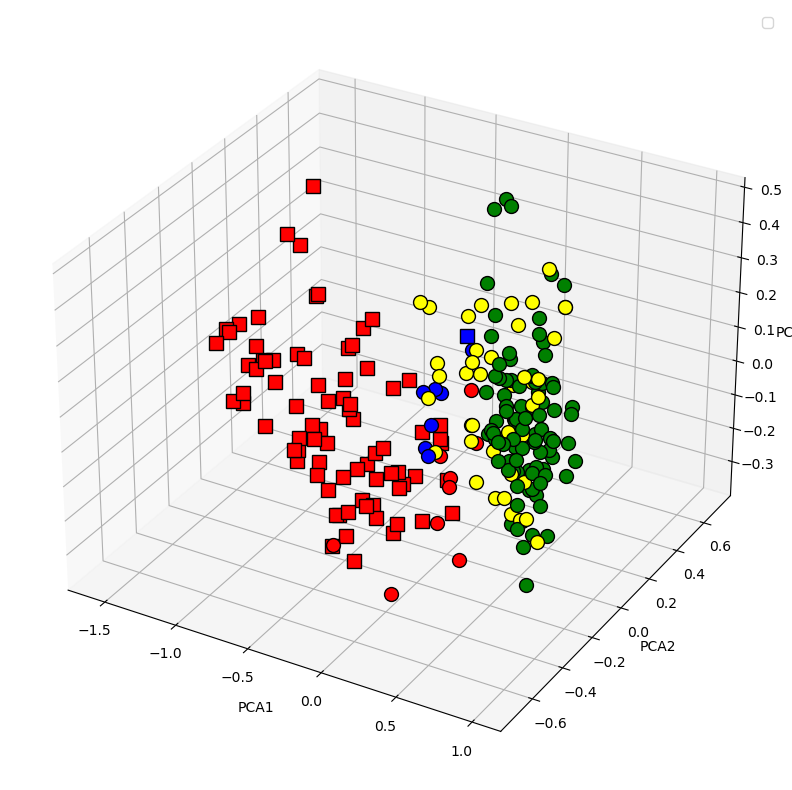

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for index, row in df.iterrows():
    if(row["Winner Cluster"] == "cluster_0"):
        markerToUse = 'o'
    else:
        markerToUse = 's'
    if(row["Macro territory"] in ['North-West', 'North-East', 'North']):
        colorToUse = "green"
    elif(row["Macro territory"] == 'Centre'):
        colorToUse = "yellow"
    elif(row["Macro territory"] in ['South','Southern regions', 'Islands' ]):
        colorToUse = "red"
    else:
        colorToUse = "blue"
        
    plt.plot(row["PCA dimension 0"],row["PCA dimension 1"],row["PCA dimension 2"],marker=markerToUse, markerfacecolor=colorToUse, markersize=10, markeredgecolor="black")

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
plt.savefig("./figures/clustering.png", bbox_inches='tight')
plt.show()